In [ ]:
import random
import matplotlib.pyplot as plt

In [358]:
#generating random data 
def generate_data(r, len):
    heights = random.choices(range(r+1), k=len) 
    ox = list(range(len)) 
    return heights, ox

In [359]:
def deepest_lake (heights):
    n = len(heights)
    if n < 3:
        return None

    max_depth = 0
    deepest_lake_info = None #to store info needed to visualization

    #checking subsequences [0:2], [0:3] ... [0:]; [1:3], [1,4] etc
    for i in range(n):
        for j in range(i+2, n):
            subsequence = heights[i:j+1]
            left = i
            right = j

            #computing depth if all requirements are met
            if subsequence[0] == max(subsequence[:len(subsequence)-1]) and subsequence[-1] == max(subsequence[1:]):
                depth = min(heights[left], heights[right]) - min(subsequence[1:-1])

                #saving data for the max_depth so far
                if depth > max_depth:
                    max_depth = depth
                    deepest_lake_info = (left, right, min(subsequence))

            #if element inside will be bigger than one of the boundaries it will not be considered 
            #as lake, so we can skip excessive checking
            if left < right:
                continue        

    return deepest_lake_info          

In [ ]:
#visualization 
def visualization(ox, oy):
    if len(ox) != len(oy):
        raise ValueError("ox and oy must have the same length.")
     
    lake_info = deepest_lake(oy)
    plt.plot(ox, oy)
    plt.title('Deepest Lake')
    if lake_info:
        left, right, lowest_point, = lake_info

        #highlighting the deepest lake if it exists
        plt.plot(ox[left:right+1], oy[left:right+1],'r')
        
        plt.axhline(y=lowest_point, color='green', linestyle='dashed')
        plt.axhline(y=min(oy[left],oy[right]), color='green', linestyle='dashed')


    plt.show()

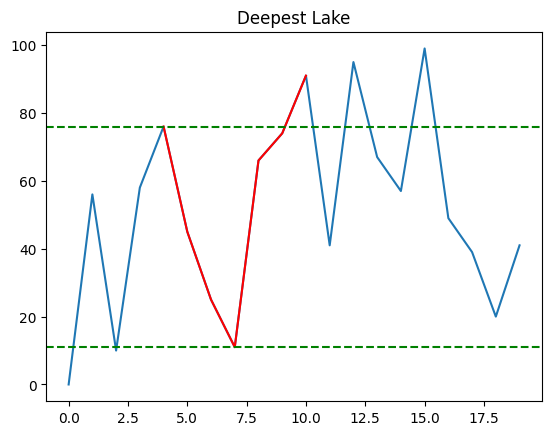

In [361]:
heights, ox = generate_data(100,20)
visualization(ox, heights)
